In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

## Section 1: Tensors - The Building Blocks
---------------------------------------
Just as vectors and matrices are fundamental in physics, tensors are the basic 
building blocks in PyTorch. We'll draw parallels between physical quantities 
and neural network components.

### 1.1 Creating Tensors
Similar to how we represent physical quantities with different ranks
(scalars, vectors, matrices, etc.)

In [3]:
# Scalar (rank-0 tensor) - like temperature at a point
scalar = torch.tensor(3.14)
print("Scalar (temperature):", scalar)

Scalar (temperature): tensor(3.1400)


In [4]:
# Vector (rank-1 tensor) - like force or velocity
vector = torch.tensor([1.0, 2.0, 3.0])
print("Vector (force components):", vector)
print("vector multiplication:", vector @ vector) 
print("Taking Power", vector.pow(2))
print("Reshaping the vector", vector.view(3,1))


Vector (force components): tensor([1., 2., 3.])
vector multiplication: tensor(14.)
Taking Power tensor([1., 4., 9.])
Reshaping the vector tensor([[1.],
        [2.],
        [3.]])


In [5]:
# Matrix (rank-2 tensor) - like stress tensor or moment of inertia
matrix = torch.tensor([[1.0, 2.0], 
                      [3.0, 4.0]])
print("Matrix (stress tensor):", matrix)

Matrix (stress tensor): tensor([[1., 2.],
        [3., 4.]])


## Section 2: Tensor Operations
--------------------------
Many operations in physics have direct analogies in deep learning.
We'll explore these connections.


### 2.1 Matrix Operations
Similar to quantum mechanical operators

Creating a quantum-like state vector

In [6]:
psi = torch.tensor([1.0, 0.0])  # |0⟩ state
H = torch.tensor([[1.0, 1.0],   # Hadamard-like operator
                 [1.0, -1.0]]) / np.sqrt(2.0)

In [7]:
# Apply operator (matrix multiplication)
psi_transformed = H @ psi
print("\nQuantum state transformation:", psi_transformed)


Quantum state transformation: tensor([0.7071, 0.7071])


### 2.2 Gradients and Backpropagation
Similar to finding minimum energy states in physics

In [8]:
def potential_energy(x):
    """Simple harmonic oscillator potential: V(x) = kx²/2"""
    return 0.5 * x**2

In [9]:
# Create a tensor with requires_grad=True to track computations
x = torch.tensor([2.0], requires_grad=True)
V = potential_energy(x)

In [10]:
# Calculate gradient (dV/dx)
V.backward()
print("\nGradient at x=2:", x.grad)  # Should be 2.0 for V(x) = x²/2



Gradient at x=2: tensor([2.])


## Section 3: Neural Network Basics
------------------------------
Building on |our physics intuition to understand neural networks.

### 3.1 Activation Functions
Similar to response functions in physical systems


In [11]:
x = torch.linspace(-5, 5, 100)

In [12]:
# ReLU (like a threshold response)
relu = torch.nn.functional.relu(x)

In [13]:
sigmoid = torch.sigmoid(x)

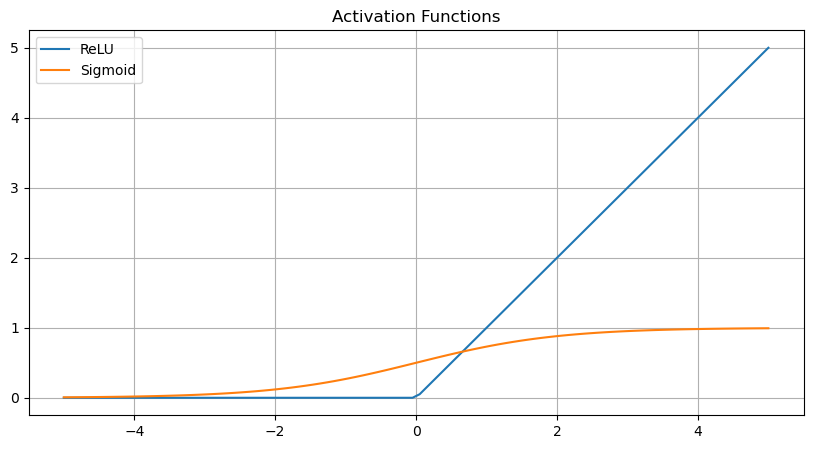

In [14]:
plt.figure(figsize=(10, 5))
plt.plot(x.numpy(), relu.numpy(), label='ReLU')
plt.plot(x.numpy(), sigmoid.numpy(), label='Sigmoid')
plt.title('Activation Functions')
plt.legend()
plt.grid(True)
plt.show()

### 3.2 Creating a Simple Neural Network

In [15]:
# 1. Check if MPS (Metal Performance Shaders) is available
def check_mps_available():
    if not torch.backends.mps.is_available():
        if not torch.backends.mps.is_built():
            print("MPS not available because PyTorch was not built with MPS enabled")
        else:
            print("MPS not available because the current MacOS version is not 12.3+ "
                  "and/or you do not have an MPS-enabled device")
        return False
    return True

# 2. Get the appropriate device
def get_device():
    if check_mps_available():
        device = torch.device("mps")
        print("Using MPS (Apple Silicon GPU)")
    else:
        device = torch.device("cpu")
        print("Using CPU")
    return device

In [16]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.layer1 = nn.Linear(2, 5)    # 2 features and 5 hidden neurons
        self.relu = nn.ReLU()            # activation function
        self.layer2 = nn.Linear(5, 1)    # Output layer: 5 -> 1

    def forward(self, x):
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        return x

In [17]:
model = SimpleNN()
print(model)

SimpleNN(
  (layer1): Linear(in_features=2, out_features=5, bias=True)
  (relu): ReLU()
  (layer2): Linear(in_features=5, out_features=1, bias=True)
)


### 3.2.1 Training Example

In [18]:
np.random.seed(42)
X = np.random.randn(100,2) # 100 samples and 2 features
y = (X[:,0] + X[:, 1] > 0).astype(np.float32) # simple classification rule


In [19]:
# converting them into tensors

X_tensor = torch.FloatTensor(X)
y_tensor = torch.FloatTensor(y).view(-1,1)

In [20]:
# define optimizer and loss functions
criterion = nn.BCEWithLogitsLoss() # Binary cross entropy loss
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [21]:
print("Training the Model ....")

for epoch in range(1000):
  outputs = model(X_tensor)
  loss = criterion(outputs, y_tensor)
  
  # backward pass and optimization 
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  
  
  if (epoch + 1) % 20 == 0:
    print(f'Epoch [{epoch + 1}/100], Loss: {loss.item():.4f}')

Training the Model ....
Epoch [20/100], Loss: 0.6700
Epoch [40/100], Loss: 0.6547
Epoch [60/100], Loss: 0.6398
Epoch [80/100], Loss: 0.6253
Epoch [100/100], Loss: 0.6110
Epoch [120/100], Loss: 0.5967
Epoch [140/100], Loss: 0.5822
Epoch [160/100], Loss: 0.5680
Epoch [180/100], Loss: 0.5540
Epoch [200/100], Loss: 0.5400
Epoch [220/100], Loss: 0.5260
Epoch [240/100], Loss: 0.5121
Epoch [260/100], Loss: 0.4984
Epoch [280/100], Loss: 0.4847
Epoch [300/100], Loss: 0.4710
Epoch [320/100], Loss: 0.4575
Epoch [340/100], Loss: 0.4440
Epoch [360/100], Loss: 0.4308
Epoch [380/100], Loss: 0.4179
Epoch [400/100], Loss: 0.4055
Epoch [420/100], Loss: 0.3934
Epoch [440/100], Loss: 0.3818
Epoch [460/100], Loss: 0.3706
Epoch [480/100], Loss: 0.3599
Epoch [500/100], Loss: 0.3495
Epoch [520/100], Loss: 0.3396
Epoch [540/100], Loss: 0.3301
Epoch [560/100], Loss: 0.3209
Epoch [580/100], Loss: 0.3121
Epoch [600/100], Loss: 0.3037
Epoch [620/100], Loss: 0.2957
Epoch [640/100], Loss: 0.2879
Epoch [660/100], Los

In [22]:
# GPU Support if available
device = torch.device("cuda" if torch.cuda.is_available() else 'cpu')

print(f"Available device: {device}")

Available device: cpu


In [26]:
pip install sns

  Preparing metadata (setup.py) ... done
  Created wheel for sns: filename=sns-0.1-py3-none-any.whl size=2639 sha256=97015e2175bca617517dc1c70a701f64bb41e3535e59972e66127ec9057573b6
  Stored in directory: /Users/muntazirabidi/Library/Caches/pip/wheels/76/1a/47/c3b6a8b9d3ae47b1488f4be13c86586327c07e0ac1bb5b3337
Successfully built sns
Note: you may need to restart the kernel to use updated packages.


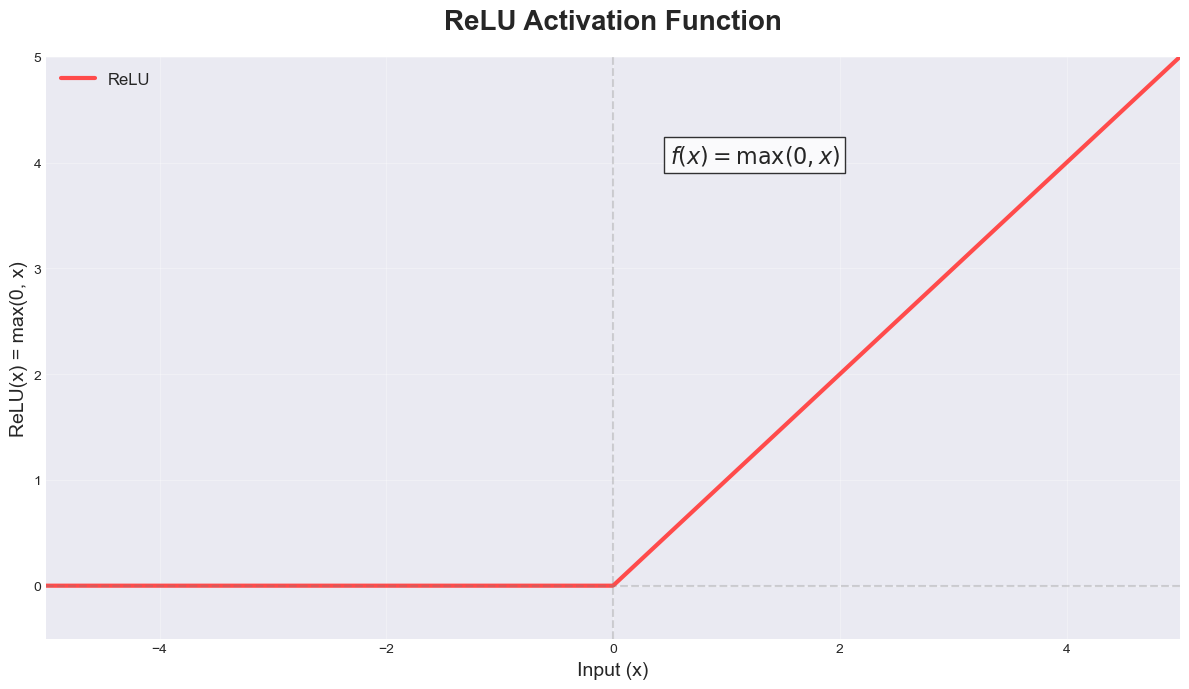

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Create data points
x = np.linspace(-5, 5, 1000)
relu = np.maximum(0, x)

# Create the figure with a specific size
plt.figure(figsize=(12, 7))

# Plot ReLU function with a thicker line
plt.plot(x, relu, linewidth=3, label='ReLU', color='#FF4B4B')

# Add horizontal and vertical lines at 0
plt.axhline(y=0, color='gray', linestyle='--', alpha=0.3)
plt.axvline(x=0, color='gray', linestyle='--', alpha=0.3)

# Customize the plot
plt.title('ReLU Activation Function', fontsize=20, pad=20, weight='bold')
plt.xlabel('Input (x)', fontsize=14)
plt.ylabel('ReLU(x) = max(0, x)', fontsize=14)

# Add formula
plt.text(0.5, 4, r'$f(x) = \max(0, x)$', fontsize=16, 
         bbox=dict(facecolor='white', alpha=0.8))

# Customize grid
plt.grid(True, alpha=0.3)

# Set axis limits
plt.xlim(-5, 5)
plt.ylim(-0.5, 5)

# Add legend
plt.legend(fontsize=12)

# Adjust layout
plt.tight_layout()

plt.show()